# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [23]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [60]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

0     (9.093156078135392, 0.010603426885063313)
1    (0.015147114510852398, 0.9924550498645474)
2       (0.904088081829952, 0.6363261447223314)
3     (4.5435117284038204, 0.10313093709007787)
4      (1.2525600673681374, 0.5345767141829014)
dtype: object

#### Interpret the normaltest results and make your observations.

In [52]:
# Explain the test results here
Si el valor de la segunda columna, de los p-values, se acerca mas al 1, 
hay mas probabilidad que los datos provengan de una distribución normal.
Lo mismo pasa con la segunda columna, si el statistic se acerca mas al 
0, mas probalidiad hay de que sea una distribución normal


0    [56.5731396796009, 44.465287812382336, 54.5836...
1    [50.61613184611497, 39.02859558259913, 61.1363...
2    [49.4672665316007, 49.94962189985096, 59.57851...
3    [50.438279771152125, 57.08835441383325, 51.051...
4    [49.97751814389767, 47.913448786632436, 52.688...
dtype: object

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

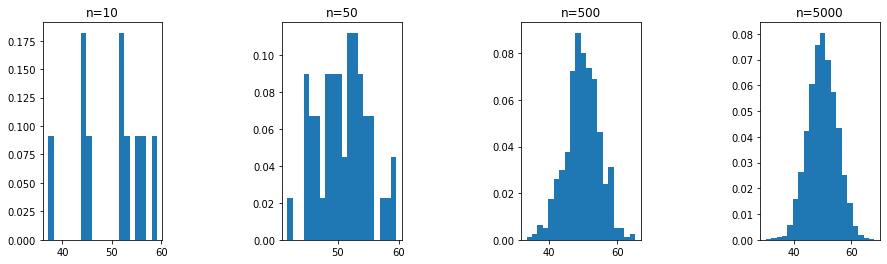

In [26]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

# Your comment and explanation here
Al aumentar la población la simetría del histograma aumenta, esto es debido al teorema del limite central. De  normal a partir de n=50 se empiza a notar cierta simetría.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

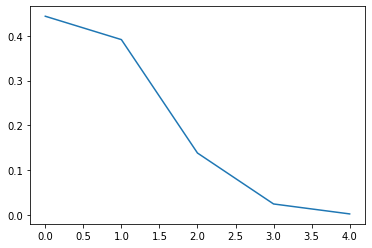

In [28]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [29]:
# Your comment here
La maxima probabilidad del click en el video de youtube se produce al principio y despues va bajando.

#### Now plot PMP with 50, 500, and 5000 visitors.

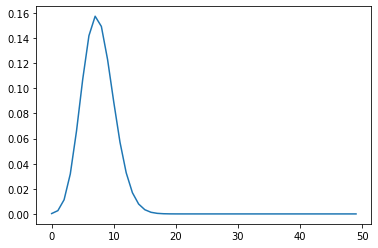

In [62]:
# Your code here
n, p = 50, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

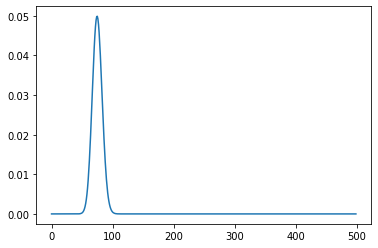

In [63]:
n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

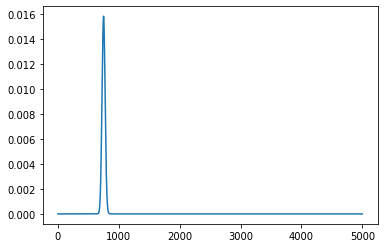

In [64]:
n, p = 5000, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [31]:
# Your comment here
Al aumentar la n, el gráfico se vuelve mas simétrico y la probabilidad cada vez se concentra mas en un punto

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [32]:
# Your comment here
La distribución de Poisson determina la probabilidad de que suceda un suceso, cuando la muestra es grande y 
la probabilidad de éxito es muy baja, se utiliza en situaciones donde
los sucesos son imprevisibles

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

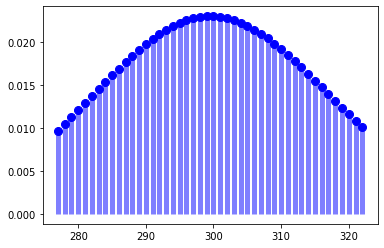

In [75]:
# Your code here
from scipy.stats import poisson
fig, ax = plt.subplots(1, 1)
mu = 300
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(1-300/330, mu),poisson.ppf(300/330, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
rv = poisson(mu)


In [88]:
mu = 300
prob = poisson.cdf(320, mu)
prob

0.8809955143948803

#### What is the probability of getting 60 visits?

In [87]:
# Your code here
mu = 300
prob = poisson.cdf(60, 300)
prob

3.275053111798523e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

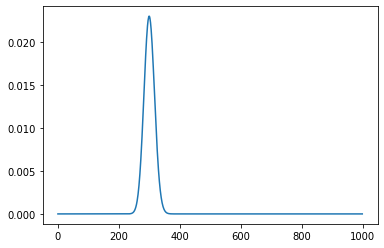

In [35]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)